In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import json
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_json("rtvslo_keywords.json")
df['keywords_str'] = df['gpt_keywords'].apply(lambda x: ' '.join(word.replace(' ', '_') for word in x))

tfidf_vectorizer = TfidfVectorizer(min_df=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['keywords_str'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df


,10,11,12,13,14,15,16,17,18,19,...,švica,ženska,ženske,žirija,živali,življenje,žreb,žrtev,žrtve,župan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(tfidf_df)

pca_df = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2', 'PC3'])
pca_df

,PC1,PC2,PC3
0,0.063872,-0.019922,-0.028175
1,-0.085462,-0.063218,0.077960
2,-0.061876,0.050730,-0.001314
3,0.187357,-0.015158,-0.017648
4,-0.041387,0.039411,-0.036823
...,...,...,...
20976,-0.057964,-0.090582,-0.105672
20977,0.048186,0.020127,0.009446
20978,-0.075583,-0.016317,0.048724
20979,-0.044893,0.081117,-0.022643


In [25]:

# Create a 3D biplot
nr_points = 1000

pca_subdf = pca_df.sample(n=nr_points, random_state=42)
tfidf_subdf = tfidf_df.loc[pca_subdf.index]


In [15]:
norms = pca_subdf.apply(np.linalg.norm, axis=1)
# print(norms)
# print(norms.sort_values(ascending=False))
# print(norms.sort_values(ascending=False).index[:10])

largest_samples_idx = norms.sort_values(ascending=False).index[:10]
largest_samples_idx

Index([18881, 11642, 15564, 16706, 10658, 744, 5928, 10477, 7178, 2041], dtype='int64')

In [16]:
largest_samples_idx = pca_subdf.abs().sort_values(by='PC1', ascending=False).index[:4]
print(pca_subdf.sort_values(by='PC1', ascending=False).index[:3])
print(pca_subdf.abs().sort_values(by='PC1', ascending=False).index[:3])

largest_samples_idx = largest_samples_idx.union(pca_subdf.abs().sort_values(by='PC2', ascending=False).index[:4])
print(pca_subdf.sort_values(by='PC2', ascending=False).index[:3])
print(pca_subdf.abs().sort_values(by='PC2', ascending=False).index[:3])

largest_samples_idx = largest_samples_idx.union(pca_subdf.abs().sort_values(by='PC3', ascending=False).index[:4])
print(pca_subdf.sort_values(by='PC3', ascending=False).index[:3])
print(pca_subdf.abs().sort_values(by='PC3', ascending=False).index[:3])


largest_samples_idx


Index([18881, 11642, 15564], dtype='int64')
Index([18881, 11642, 15564], dtype='int64')
Index([19093, 14111, 8295], dtype='int64')
Index([19093, 14111, 8295], dtype='int64')
Index([8295, 18937, 17551], dtype='int64')
Index([8295, 12103, 18937], dtype='int64')


Index([8295, 10105, 10477, 11642, 12103, 14111, 15564, 18881, 18937, 19093,
       20867],
      dtype='int64')

In [17]:

most_important_features = tfidf_df.idxmax(axis=1).iloc[largest_samples_idx]
most_important_features


8295        napad
10105       napad
10477         par
11642      domače
12103     volitve
14111    politika
15564       laško
18881        liga
18937      spopad
19093       pomoč
20867     škotska
dtype: object

In [30]:
# most_important_features = df["title"].iloc[largest_samples_idx]
# most_important_features.shape

(11,)

In [36]:
most_important_features= np.argsort(np.linalg.norm(pca.components_.T, axis=1))
most_important_features


array([1836, 1101,  139, ..., 2004, 1669, 1778])

In [39]:
loadings = pca.components_.T[most_important_features][-30:]
loadings

array([[ 0.12560461, -0.0334495 , -0.04707593],
       [ 0.02705139,  0.02215266,  0.13435226],
       [-0.05230912, -0.13253606,  0.04404207],
       [-0.05028454, -0.1138979 , -0.08464685],
       [ 0.14943692, -0.02259035, -0.01633882],
       [-0.02939584, -0.0872647 , -0.12140808],
       [-0.02599529, -0.08939668, -0.12154194],
       [ 0.01971184,  0.02550768,  0.15427601],
       [ 0.13792735, -0.04158858, -0.06662632],
       [-0.07026776, -0.11043154,  0.09916586],
       [ 0.15355456, -0.04166747, -0.05308208],
       [-0.01398989,  0.15543229, -0.07264582],
       [-0.03576674, -0.11397467, -0.13726063],
       [ 0.10738696, -0.09413765, -0.13021615],
       [-0.04285558, -0.07843176, -0.17320497],
       [-0.03229718,  0.17259359, -0.08896037],
       [ 0.19127792, -0.01585083,  0.05373746],
       [-0.03620592, -0.13218655, -0.14940025],
       [-0.03248443, -0.13342404, -0.14919465],
       [ 0.19498464, -0.03715617, -0.04838313],
       [-0.02573967,  0.1875518 , -0.088

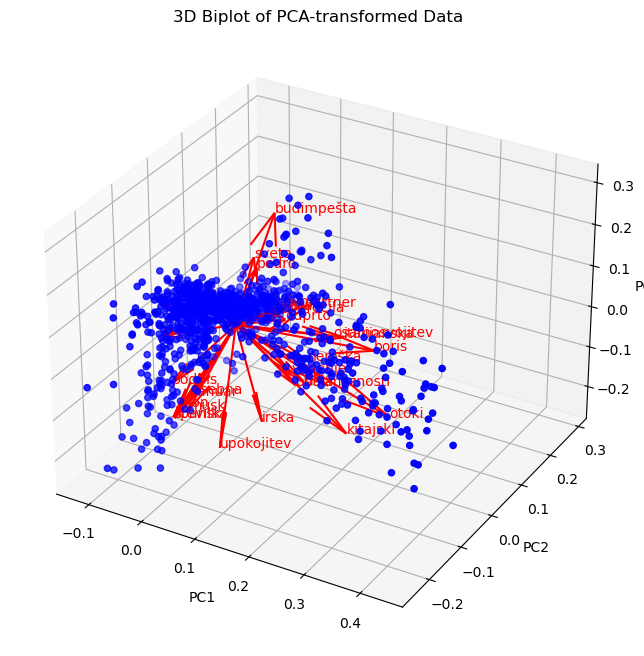

In [40]:


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_subdf['PC1'], pca_subdf['PC2'], pca_subdf['PC3'], c='blue', marker='o')


# ax.text(pca_subdf.loc[largest_samples_idx, 'PC1'], pca_subdf.loc[largest_samples_idx, 'PC2'], pca_subdf.loc[largest_samples_idx, 'PC3'], most_important_features.values, color='red')

# best_PC1_index = pca_subdf['PC1'].abs().idxmax()
# best_PC2_index = pca_subdf['PC2'].abs().idxmax()
# best_PC3_index = pca_subdf['PC3'].abs().idxmax()

# ax.scatter(pca_subdf.loc[best_PC1_index, 'PC1'], pca_subdf.loc[best_PC1_index, 'PC2'], pca_subdf.loc[best_PC1_index, 'PC3'], c='red', marker='x')
# ax.text(pca_subdf.loc[best_PC1_index, 'PC1'], pca_subdf.loc[best_PC1_index, 'PC2'], pca_subdf.loc[best_PC1_index, 'PC3'], , color='red')

# ax.scatter(pca_subdf.loc[best_PC2_index, 'PC1'], pca_subdf.loc[best_PC2_index, 'PC2'], pca_subdf.loc[best_PC2_index, 'PC3'], c='red', marker='x')
# ax.text(pca_subdf.loc[best_PC2_index, 'PC1'], pca_subdf.loc[best_PC2_index, 'PC2'], pca_subdf.loc[best_PC2_index, 'PC3'], 'best PC2', color='red')

# ax.scatter(pca_subdf.loc[best_PC3_index, 'PC1'], pca_subdf.loc[best_PC3_index, 'PC2'], pca_subdf.loc[best_PC3_index, 'PC3'], c='red', marker='x')
# ax.text(pca_subdf.loc[best_PC3_index, 'PC1'], pca_subdf.loc[best_PC3_index, 'PC2'], pca_subdf.loc[best_PC3_index, 'PC3'], 'best PC3', color='red')

# # Adding loadings to the plot

for i, loading in enumerate(loadings):
    feature = tfidf_df.columns[most_important_features[i]]
    ax.quiver(0, 0, 0, loadings[i, 0], loadings[i, 1], loadings[i, 2], color='r')
    ax.text(loadings[i, 0], loadings[i, 1], loadings[i, 2], feature, color='r')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Biplot of PCA-transformed Data')
plt.show()

#### SPREMENI TAKO DA BODO BESEDE SKUPAJ


In [6]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne.fit_transform(tfidf_df)

# Create a DataFrame for the t-SNE-transformed data
tsne_df = pd.DataFrame(tsne_transformed, columns=['Dim1', 'Dim2'])

# Plot the t-SNE-transformed data
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], c='blue', marker='o')
plt.title('t-SNE Plot of TF-IDF Transformed Data')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.show()